# Task-1 : Prediction using Supervised ML

## Submitted By : Vivek Saharan

### To Predict the percentage of marks based on the number of study hours


In [46]:
#Importing required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Reading data from the given url

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("data imported")

data imported


In [48]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Creating a plot to find any kind of relationship between the data

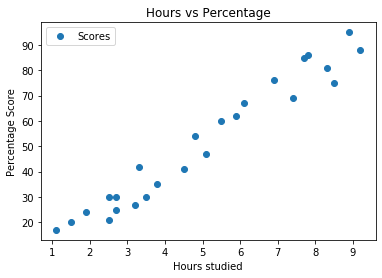

In [49]:
data.plot(x = 'Hours', y = 'Scores', style ='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.show()

### Above graph shows that there is a positive correlation between percentage score and hours studied

## Preparing the Data

In [50]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

### Spliting the data into training and test sets.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2, random_state=0)

## Training the Algorithm


In [52]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print('Training completed')

Training completed


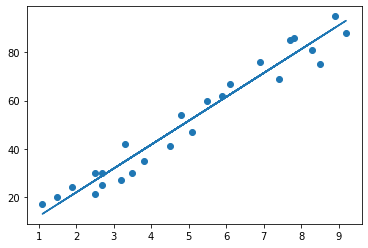

In [53]:
# Plotting Regression Line

line = regressor.coef_*x + regressor.intercept_

# Plotting for the test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Making Predictions

In [54]:
# Testing data
print(X_test)
# Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [55]:
# Comparison of actual to predicted

df = pd.DataFrame({'Actual' : Y_test, 'Predicted' : y_pred})

In [56]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Prediction of scores in accordance with hours studied

In [59]:
hours = np.array(9.25)
hours=hours.reshape(-1,1)
own_pred=regressor.predict(hours)
print("no. of hours={}".format(hours))
print("predicted score ={}".format(own_pred[0]))

no. of hours=[[9.25]]
predicted score =93.69173248737538


## Conclusion : A student would score 93.69%, if he studies for 9.25hrs.



## Lastly we would evaluate our model

### Here, we are chosing mean square error metric.

In [60]:
from sklearn import metrics
print('Mean absolute error :',metrics.mean_absolute_error(Y_test,y_pred))

Mean absolute error : 4.183859899002975
